# Exam 1 - solution
 
Submit this file to Canvas as a PDF or HTML before Fri Oct 31, 2025 at 5:00pm to earn **+1 bonus points**. Extended deadline Sun Nov 2, 2025 at 11:59 pm for +0 bonus points. 

* You are **not** permitted to discuss this exam with anyone besides the TA and professor. 
* You are welcome to use analytical and numerical computational tools (including generative AI like LLM); if you do, include the **commented** sourcecode (or prompts) in your submission.
* You are welcome to consult websites, textbooks, and other materials; if you do, include a full citation in your writeup (e.g. the .pdf and/or .html file).

This exam is worth a total of **38 points**. Each subproblem is worth 2 points. Exams will be graded on a 0-1-2 grading scale: 0 for no attempt; 1 for an incorrect attempt; 2 for a correct attempt (with partially-correct attempts possibly receiving between 1 and 2). 

**Accessibility Note:** This exam contains many embedded figures that do not have alt text. If you have any trouble distinguishing important features of these figures (due to color or lack of alt text, etc.) and require any modifications to improve the figures' accessibility, please reach out to Prof. Ingraham. 

# problem 1 - feedforward + feedback control block diagram (4 points)

![problem1](25fa_exam1_figures/blockDiagram1.png)

Consider the block diagram above, which shows a combination of feedforward and feedback control. Signal $r$ is reference, $y$ is output, $v$ is disturbance, $u$ is control signal, and $e$ is error. Block $B(s)$ is the feedBack controller, $P(s)$ is the process, $F(s)$ is the feedForward controller, and $D(s)$ is the disturbance model. 

## subproblem 1a
Find the closed-loop transfer function $G_{yv}$ for this system, that is, the transfer function from disturbance $v$ to output $y$. 

### solution 1a
Using block diagram algebra, we can write down the following equations: 
$$ y = Dv + Pu , \quad u = Be - Fv , \quad e = r-y$$
Combine and substitute until the only variables left are the inputs to the block diagram: $v, r, y$ 
$$\begin{align} y &= Dv + Pu \\
y &= Dv + P(Be-Fv) \\
 % &= Dv + PBe - PFv \\
 y &= Dv + PB(r-y) - PFv \\
 y &= (D-PF)v + PBr - PBy \\ 
y + PBy &= (D-PF)v + PBr \\
y (1+PB) &= (D-PF)v + PBr \\ 
y &= \cfrac{(D-PF)}{1+PB}v + \cfrac{PB}{1+PB}r \end{align}$$

$$\fbox{$G_{yv} = \cfrac{(D-PF)}{1+PB} $}$$

## subproblem 1b
For this subproblem, use the following definitions:  
$$ B(s) = 3, \quad P(s) = \cfrac{1}{s+5}, \quad F(s) = \cfrac{s+6}{2}, \quad D(s) = 1 $$

For a constant disturbance $v(t) = v_0$, what is the steady-state output $y_0$ for the system? Recall that the steady-state output of the system is defined as $y(t)$ as $t \rightarrow \infty$. 

### solution 1b (algebraic)
First, we must plug the definitions of each block into our closed-loop transfer function $G_{yv} = \cfrac{(D-PF)}{1+PB} $

$$ G_{yv} = \cfrac{1 - \cfrac{s+6}{2(s+5)}}{1 + \cfrac{3}{s+5}} \cdot \cfrac{s+5}{s+5} = \cfrac{s+5 - \cfrac{s+6}{2}}{s+5 + 3} \cdot \cfrac{2}{2}= \cfrac{2s + 10 - s - 6}{2s + 10 + 6} = \cfrac{s+4}{2s+16}$$

Next, we know $v_0$ is a constant disturbance, which can be re-written as $v_0 = v_0e^{0t}$, which tells us the particular frequency for this input signal is $s=0$. 

The steady-state output $y_0$ can be calculated as $y_0 = G_{yv}(0)v_0 = \cfrac{0+4}{0+16} v_0 = \cfrac{1}{4}v_0 $. 

$$\fbox{$y_0 = \cfrac{1}{4} v_0 $}$$

**Note:** If you solved subproblem 1a incorrectly, but correctly evaluated your transfer function at $s=0$, you will earn full credit for subproblem 1b. 

### solution 1b (code)

In [3]:
from _447 import *
sym.var('s',complex=True) # equivalent to s = sym.symbols('s',complex=True)
sym.var('a,b,k_P',positive=True)

B = 3
P = 1 / (s + 5)
F = (s + 6) / 2
D = 1 

G_yv = (D - P*F) / (1 + P*B)

# un-simplified
print('unsimplified G_yv =',G_yv)

# simplified
G_yv = sym.simplify(G_yv)
print('simplified G_yv =',G_yv)

# formatted
G_yv

# substitue s = 0
y0 = G_yv.subs({s:0})
y0

unsimplified G_yv = (-(s/2 + 3)/(s + 5) + 1)/(1 + 3/(s + 5))
simplified G_yv = (s + 4)/(2*(s + 8))


1/4

# problem 2 - transfer function and linear state space (4 points)

![problem2](25fa_exam1_figures/flywheels.png)

Consider the physical system above. One flywheel (with moment of inertia $J_1$) is attached to an ummoving wall by a flexible rod with spring constant $k$ and has an applied torque, $\tau$.  A second flywheel (with moment of inertia $J_2$) is driven by friction between the two flywheels with damping coefficient $b_1$.  The second flywheel also has friction between it and the ground, with damping coefficient $b_2$. The angle of each flywheel is designated $\theta_1$ and $\theta_2$. Your Mechanical Engineering colleague (correctly) derives the following equations of motion for this system: 

$$J_1 \ddot{\theta}_1 + b_1 (\dot{\theta}_1 - \dot{\theta}_2) + k \theta_1  = - \tau \qquad (1)$$
$$J_2 \ddot{\theta}_2 - b_1 \dot{\theta}_1 + (b_1 + b_2) \dot{\theta_2} = 0 \qquad (2) $$ 


## subproblem 2a
Derive the **transfer function** for this system from applied torque $\tau$ to output position $\theta_2$. That is, find $G_{\theta_2 \tau} = \frac{\Theta_2(s)}{T(s)}$. Your solution should be in terms of variable $s$ and constants $J_1, J_2, b_1, b_2,$ and $k$. Assume all initial conditions are zero. 

**Note**: You do not need to expand your polynomial expressions completely in the final answer. Please write your solution as a product of lower order polynomials. Simplify your answer until you have an expression that is the product of one set of polynomials over the product of another set of polynomials, such as $\frac{(s+2)(s+1)}{(s^2 + s + 1)(s^2 + s +1)}.$ This note is only showing you the *form* your answer should appear in, and contains no information about how many polynomial expressions appear in numerator or denominator or their order. 

### solution 2a

Assuming initial conditions are zero, take the Laplace transform of equations $(1)$ and $(2)$. I will denote $\Theta_1(s)$, $\Theta_2(s)$, and $T(s)$ as $\Theta_1$, $\Theta_2$, and $T$: 
$$
\begin{align}
J_1 s^2 \Theta_1 + b_1(s\Theta_1 - s\Theta_2) + k\Theta_1 &= -T\\[4pt]
J_2 s^2 \Theta_2 - b_1 s\Theta_1 + (b_1 + b_2)s\Theta_2 &= 0
\end{align}
$$

Isolate $\Theta_1$ and $\Theta_2$ by grouping terms: 

$$ 
\begin{align}(J_1 s^2 + b_1 s + k)\Theta_1 - b_1 s\Theta_2 = -T \qquad &(3) \\[4pt]
-b_1 s\Theta_1 + (J_2 s^2 + (b_1 + b_2)s)\Theta_2 = 0 \qquad &(4)
\end{align}
$$

We need everything in terms of only $\Theta_2$, so we find an expression for $\Theta_1$ as a function of $\Theta_2$ using Eq. $(4)$: 
$$
-b_1 s\Theta_1 + (J_2 s^2 + (b_1 + b_2)s)\Theta_2 = 0
\quad\Rightarrow\quad
\Theta_1 = \frac{J_2 s^2 + (b_1 + b_2)s}{b_1 s}\,\Theta_2
$$

Plug this expression back into Eq. $(3)$: 
$$(J_1 s^2 + b_1 s + k)\left(\frac{J_2 s^2 + (b_1 + b_2)s}{b_1 s}\Theta_2\right) - b_1 s\Theta_2 = -T$$

Simplify: 
$$ \left[\frac{(J_1 s^2 + b_1 s + k)(J_2 s^2 + (b_1 + b_2)s)}{b_1 s} - b_1 s\right]\Theta_2 = -T \quad\Rightarrow\quad \left[(J_1 s^2 + b_1 s + k)(J_2 s^2 + (b_1 + b_2)s) - (b_1 s)^2\right] \Theta_2 = -b_1 s T$$

Solve for $\cfrac{\Theta_2}{T}$:
$$\boxed{
G_{\theta_2\tau}
= \frac{\Theta_2(s)}{T(s)}
= \frac{-b_1 s}
{(J_1 s^2 + b_1 s + k)(J_2 s^2 + (b_1 + b_2)s) - (b_1 s)^2}
}$$

Also acceptable answers: 

In [11]:
from _447 import *
sym.var('s',complex=True) 
sym.var('b1,b2,J1,J2,k')
G = (-b1*s) / ((J1*s**2 + b1*s + k)*(J2*s**2 + (b1 + b2)*s) - (b1*s)**2)

sym.collect(sym.expand(G),s)

                                  -b₁⋅s                                    
───────────────────────────────────────────────────────────────────────────
       4    3                            2                                 
J₁⋅J₂⋅s  + s ⋅(J₁⋅b₁ + J₁⋅b₂ + J₂⋅b₁) + s ⋅(J₂⋅k + b₁⋅b₂) + s⋅(b₁⋅k + b₂⋅k)

In [13]:
sym.expand(G)

                                     -b₁⋅s                                      
────────────────────────────────────────────────────────────────────────────────
       4          3          3          3         2          2                  
J₁⋅J₂⋅s  + J₁⋅b₁⋅s  + J₁⋅b₂⋅s  + J₂⋅b₁⋅s  + J₂⋅k⋅s  + b₁⋅b₂⋅s  + b₁⋅k⋅s + b₂⋅k⋅s

## subproblem 2b
Write the equations of motion for this system in **linear state space form** using state vector $x = (\theta_1, \dot{\theta}_1, \theta_2, \dot{\theta}_2) \in \mathbb{R}^4$ and input $u = \tau \in \mathbb{R}$.

### solution 2b
Rearrange equations of motion to find expressions for $\ddot{\theta}_1, \ddot{\theta}_2$:

From $(1)$:
$$
J_1 \ddot{\theta}_1 = -\tau - k\theta_1 - b_1(\dot{\theta}_1 - \dot{\theta}_2)
\quad \Rightarrow \quad \ddot{\theta}_1 = -\frac{k}{J_1}\theta_1 - \frac{b_1}{J_1}\dot{\theta}_1 + \frac{b_1}{J_1}\dot{\theta}_2 - \frac{1}{J_1}\tau
$$

From $(2)$:
$$ 
J_2 \ddot{\theta}_2 = b_1 \dot{\theta}_1 - (b_1 + b_2)\dot{\theta}_2 \\
\quad \Rightarrow \quad  \ddot{\theta}_2 = \frac{b_1}{J_2}\dot{\theta}_1 - \frac{b_1 + b_2}{J_2}\dot{\theta}_2
$$

Now writing these in form $\dot{x} = Ax + Bu$: 

$$\dot{x} = 
\begin{bmatrix}
\dot{\theta}_1 \\ \ddot{\theta}_1 \\ \dot{\theta}_2 \\ \ddot{\theta}_2
\end{bmatrix} = 
\begin{bmatrix}
0 & 1 & 0 & 0 \\
-\frac{k}{J_1} & -\frac{b_1}{J_1} & 0 & \frac{b_1}{J_1} \\
0 & 0 & 0 & 1 \\
0 & \frac{b_1}{J_2} & 0 & -\frac{b_1 + b_2}{J_2}
\end{bmatrix}
\begin{bmatrix}
\theta_1 \\ \dot{\theta}_1 \\ \theta_2 \\ \dot{\theta}_2
\end{bmatrix}
+
\begin{bmatrix}
0 \\[3pt]
-\frac{1}{J_1} \\[3pt]
0 \\[3pt]
0
\end{bmatrix}
\tau
$$ 

# problem 3 - nonlinear phase portraits (8 points)

![problem3](25fa_exam1_figures/phasePortraits.png)

Examine the phase portraits on the left, labeled $(3a)$, $(3b)$, $(3c)$, and $(3d)$. Then, match the blue time series trajectories on the right (labeled $A, B, C,$ and $D$) to the blue state-space trajectories highlighted on each phase portrait. Explain your rationale for each choice. What features of the trajectories did you use to make your decision? 

**Note:** To earn full credit for each subproblem, you need to indicate which time series trajectory $A-D$ corresponds with each phase portrait $(3a)-(3d)$ and justify your answer in words and/or legible annotations on the graph. 

## solution 3
![solution3](25fa_exam1_figures/SOLUTION_phasePortraits.png)

### solution 3a
$(3a) = C$ because the trajectories near the blue trajectory all converge inward along the spiral. That means the intitial conditions are $(-1,3.5)$ and $x_1$ and $x_2$ converge to $(0,0)$. 

### solution 3b
$(3b) = B$ because the trajectories near the blue trajectory all diverge away towards $-\infty$. That means the intitial conditions are $(1,-1)$ and $x_1$ and $x_2$ diverge away to $(-\infty,-\infty)$. 

### solution 3c
$(3c) = D$ because the trajectories near the blue trajectory all converge to an oscillating pattern (also called a limit cycle). That means the intitial conditions are $(-1,0)$ and $x_1$ and $x_2$ converge to a stable oscillation.  

### solution 3d
$(3d) = A$ because the trajectories near the blue trajectory all converge inward along the spiral. That means the intitial conditions are $(1,-3.5)$ and $x_1$ and $x_2$ converge to approximately $(1.5,0)$.

# problem 4 - linearization (8 points)

A dc-to-dc power converter can be modeled by the nonlinear state space model: 
$$ 
\dot{x} = \begin{bmatrix} \dot{x}_1 \\ \dot{x}_2 \end{bmatrix} = 
\begin{bmatrix}
-\dfrac{1}{k}x_2 + (x_2 + k)u \\[6pt]
\dfrac{1}{k}x_1 - \alpha x_2 - (x_1 + \alpha k^2)u
\end{bmatrix} = f(x,u)
$$

For this system, $x = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \in \mathbb{R}^2$ is the state vector, $u \in \mathbb{R}$ is the input, and $k$ and $\alpha$ are positive constants. 

## subproblem 4a
Show that this system has an equilibrium point at $x_e = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$ and $u_e = 0$. 

### solution 4a
To show that the system has an equilibrium point at $x_e = (0,0)$ and $u_e=0$, we require that $\dot{x} = 0$ when we plug in $x_1 = 0$, $x_2 = 0$, and $u= 0$. Thus: 

$$ 
\dot{x} = \begin{bmatrix} \dot{x}_1 \\ \dot{x}_2 \end{bmatrix} 
\begin{bmatrix}
-\dfrac{1}{k}(0) + (0 + k)(0) \\[6pt]
\dfrac{1}{k}0 - \alpha (0) - (0 + \alpha k^2)(0)
\end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix} = 0 
$$

Since $\dot{x} = 0$ we have confirmed that $x_e = (0,0)$ and $u_e =0$ is indeed an equilibrium point for the system. 


## subproblem 4b

Linearize the system about the equilibrium point $x_e = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$ and $u_e = 0$.

Write your final linearized system in the form $\delta \dot{x} = A \delta x + B \delta u$. Make sure you write a vector or matrix expression for $A$, $B$, $\delta x$, and $\delta u$ each term to earn full credit. 

**Hint:** Recall that in this form, the A and B matrices are the *Jacobian* matrices.

### solution 4b

First, define $\delta x$ and evaluate at $x_e = (0,0)$ and define $\delta u$ and evaluate at $u_e = 0$: 
$$ \delta x = \begin{bmatrix}
x_1-x_{1e} \\ x_2 - x_{2e}
\end{bmatrix} = 
\begin{bmatrix}
x_1 \\ x_2
\end{bmatrix},
\qquad 
\delta u = u-u_e = u
$$

Next, write the Jacobian matrices and evaluate at $x_e = (0,0)$, $u_e = 0$: 

$$ A = 
\begin{bmatrix}
\frac{\partial}{\partial x_1} \dot{x}_1 & 
\frac{\partial}{\partial x_2} \dot{x}_1 \\
\frac{\partial}{\partial x_1} \dot{x}_2 & 
\frac{\partial}{\partial x_2} \dot{x}_2 \\
\end{bmatrix} = 
\left.
\begin{bmatrix}
0 & (-\frac{1}{k}+u) \\ 
(\frac{1}{k} - u) & -\alpha\\ 
\end{bmatrix} 
\right | 
_{x=(0,0), \> u=0} = 
\begin{bmatrix}
0 & -\frac{1}{k}\\ 
\frac{1}{k} & -\alpha\\ 
\end{bmatrix}
$$

$$ B = 
\begin{bmatrix}
\frac{\partial}{\partial u} \dot{x_1} \\
\frac{\partial}{\partial u} \dot{x_2} \\
\end{bmatrix} = 
\left.
\begin{bmatrix}
x_2 + k \\ -(x_1 + \alpha k^2)
\end{bmatrix}
\right | 
_{x=(0,0), \> u=0} = 
\begin{bmatrix}
k \\ -\alpha k^2
\end{bmatrix}
$$

The full linearized state space equation is given by: 
$$
\delta\dot{x} = 
\begin{bmatrix}
0 & -\frac{1}{k}\\ 
\frac{1}{k} & -\alpha\\ 
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2
\end{bmatrix} + 
\begin{bmatrix}
k \\ -\alpha k^2
\end{bmatrix} u
$$


## subproblem 4c
Your task in this subproblem is to simulate the response of the dc-to-dc power converter to a unit step input (that is, $u(t)=1$ for all $t>0$). You will simulate the response of (1) the linearized system, and (2) the full nonlinear system.  

You have been provided with a code skeleton below that is modified from the *447_tutorial_numerical_simulation.ipynb* notebook. 

To complete this subproblem, you should: 

**(1)** Add code to the section labeled "MODIFY THE CODE HERE TO SIMULATE THE LINEAR SYSTEM" and define the following: 
* A =
* B =
* dx_dt =
  
To ensure that you can complete this problem regardless if you correctly solved subproblem 4b, please use:
$$ A = \begin{bmatrix} 0 & -1 \\ 1 & -2 \end{bmatrix}, \qquad B = \begin{bmatrix} 1 \\ -2 \end{bmatrix} $$

**(2)** Add code to the section labeled "MODIFY THE CODE HERE TO SIMULATE THE NON-LINEAR SYSTEM" and define the following: 
* dx_dt_NL =

You should not need to modify the code any further than adding these four lines. When you've successfully implemented the code, your final plot should look like this: 


![problem4](25fa_exam1_figures/simulationResults.png)

In [ ]:
### code skeleton for subproblem 4c
import numpy as np
import matplotlib.style as style
style.use('tableau-colorblind10')

# System parameters
k = 1.0
a = 2.0 

# Time parameters
dt = 0.01  # Time step
T = 2     # Total simulation time
N = int(T/dt) # Number of data points in simulation
t = np.linspace(0, T, N) # Time vector

# Define initial conditions
x0 = np.array([0,0])

# Input vector 
u = np.array([np.ones(N)])

# Forward simulation
def simulate_DE(dt, x0, u):
    
    # Initialize state arrays
    x = np.array([np.zeros(N), np.zeros(N)])
    x_NL = np.array([np.zeros(N),np.zeros(N)])
    
    # specify initial conditions
    x[:,0] = x0
    x_NL[:,0] = x0

    # Euler integration
    for i in range(1, N):
        # Define current state vector (we are creating two -- one linear, one nonlinear)
        x_vec = x[:,i-1]
        x_vec_NL = x_NL[:,i-1]
    
        # Reference vector
        u_vec = u[:,i-1]

        ############ MODIFY THE CODE HERE TO SIMULATE THE LINEAR SYSTEM ##############
        # Define A matrix (2x2 matrix)
        A = 

        # Define B matrix (2x1 matrix)
        B = 
        
        # Compute derivative of state vector using linear system
        ## Hint: use x = x_vec, u = u_vec
        dx_dt = 

        ############ MODIFY THE CODE HERE TO SIMULATE THE NON-LINEAR SYSTEM ##########
        # Compute derivative of state vector using non-linear system
        ## Hint: use x1 = x_vec[0], x2 = x_vec[1], u = u_vec[0] 
        ## Hint: dx_dt_NL should be a 2x1 vector
        
        dx_dt_NL = 
        
        ###############################################
        
        # Update state using Euler's method - the next state equals the current state x + dx
        x_next = x_vec + dx_dt * dt
        x_next_NL = x_vec_NL + dx_dt_NL * dt
    
        # Store the results
        x[:,i] = x_next
        x_NL[:,i] = x_next_NL
    
    return x, x_NL # we return vectors that have been populated with our dynamical simulation

x, x_NL = simulate_DE(dt,x0,u)

# Plot the results
plt.figure()
plt.plot(t, x[0], label='x1 - linear')
plt.plot(t, x[1], label='x2 - linear')
plt.plot(t, x_NL[0],'--',label='x1 - nonlinear')
plt.plot(t, x_NL[1],'--', label='x2 - nonlinear')
plt.xlabel('Time [s]')
plt.ylabel('State')
plt.title('Response to Step Input, x0 = (0,0)')
plt.xlim(0,2)
plt.ylim(-8,5)
plt.legend(loc="lower left")
plt.grid()
plt.show()

### solution 4c

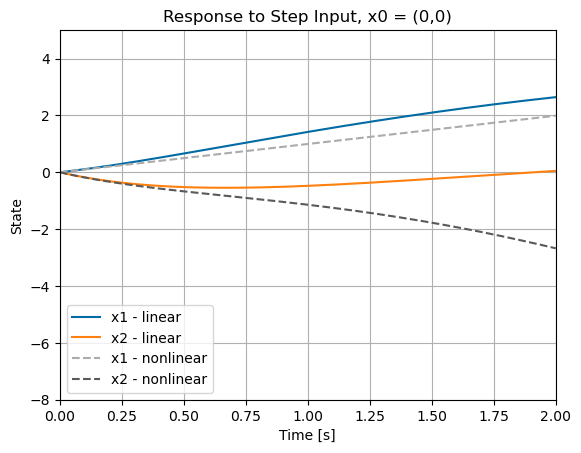

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('tableau-colorblind10')

# System parameters
k = 1.0
a = 2.0 

# Time parameters
dt = 0.01  # Time step
T = 2   # Total simulation time
N = int(T/dt) # Number of data points in simulation
t = np.linspace(0, T, N) # Time vector

# Define initial conditions
x0 = np.array([0,0])

# Input vector 
u = np.array([np.ones(N)])

# Forward simulation
def simulate_DE(dt, x0, u):
    # Initialize state arrays
    x = np.array([np.zeros(N),
                   np.zeros(N)])
    x_NL = np.array([np.zeros(N),
                   np.zeros(N)])
    
    # specify initial conditions
    x[:,0] = x0
    x_NL[:,0] = x0

    # Euler integration
    for i in range(1, N):
        # Define current state vector (we are creating two -- one linear, one nonlinear)
        x_vec = x[:,i-1]
        x_vec_NL = x_NL[:,i-1]
    
        # Reference vector
        u_vec = u[:,i-1]

        ############ MODIFY THE CODE HERE TO SIMULATE THE LINEAR SYSTEM ##############
        # Define A matrix (2x2 matrix)
        A = np.array([[0, -1],
             [1, -2]]) 

        # Define B matrix (2x1 matrix)
        B = np.array([[1],
             [-2]])

        # Compute derivative of state vector 
        ## Hint: use x = x_vec, u = u_vec
        ## Hint: dx_dt should be a 2x1 vector
        dx_dt = A @ x_vec + B @ u_vec

        ############ MODIFY THE CODE HERE TO SIMULATE THE NON-LINEAR SYSTEM ##########
        ## Hint: use x1 = x_vec[0], x2 = x_vec[1], u = u_vec[0] 
        ## Hint: dx_dt_NL should be a 2x1 vector
        
        dx_dt_NL = np.array([(-1/k)*x_vec[1] + (x_vec[1]+k)*u_vec[0], 
                              (1/k)*x_vec[0] - a*x_vec[1] - (x_vec[0] + a*k**2)*u_vec[0]])

        ##############################################################################
        
        # Update state using Euler's method - the next state equals the current state x + dx
        x_next = x_vec + dx_dt * dt
        x_next_NL = x_vec_NL + dx_dt_NL * dt
    
        # Store the results
        x[:,i] = x_next
        x_NL[:,i] = x_next_NL
    
    return x, x_NL # we return vectors that have been populated with our dynamical simulation

x, x_NL = simulate_DE(dt,x0,u)

# Plot the results
plt.figure()
plt.plot(t, x[0], label='x1 - linear')
plt.plot(t, x[1], label='x2 - linear')
plt.plot(t, x_NL[0],'--',label='x1 - nonlinear')
plt.plot(t, x_NL[1],'--', label='x2 - nonlinear')
plt.xlabel('Time [s]')
plt.ylabel('State')
plt.title('Response to Step Input, x0 = (0,0)')
plt.xlim(0,2)
plt.ylim(-8,5)
plt.legend(loc="lower left")
plt.grid()
plt.show()

### Note: there is a small error in the code skeleton that was given to you. It should not dramatically change the interpretation of the problem. If you have questions, contact Prof Ingraham. 

In the hint for the nonlinear system I told you: 

``Hint: use x1 = x_vec[0], x2 = x_vec[1], u = u_vec[0]``

To be accurate, this hint should have read: 

``Hint: use x1 = x_vec_NL[0], x2 = x_vec_NL[1], u = u_vec[0]``

If you use x_vec_NL, the final solution is very similar but slightly different than the graph you were shown. However, the qualitative  behavior you are asked to observe in the following question is the same, so it should not affect your interpretation of this problem. If you have any questions, please contact Prof Ingraham.  

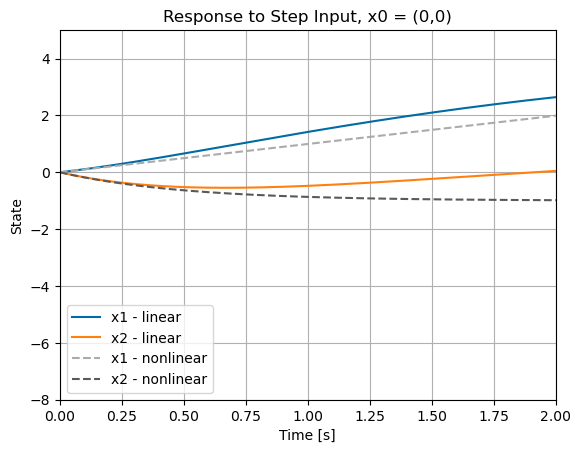

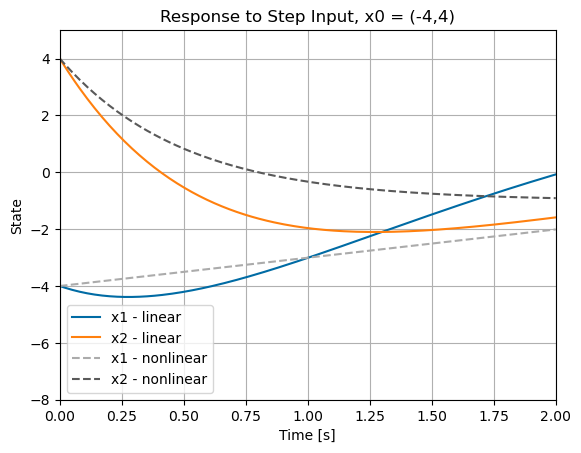

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('tableau-colorblind10')

# System parameters
k = 1.0
a = 2.0 

# Time parameters
dt = 0.01  # Time step
T = 2   # Total simulation time
N = int(T/dt) # Number of data points in simulation
t = np.linspace(0, T, N) # Time vector

# Define initial conditions
x0 = np.array([0,0])

# Input vector 
u = np.array([np.ones(N)])

# Forward simulation
def simulate_DE(dt, x0, u):
    # Initialize state arrays
    x = np.array([np.zeros(N),
                   np.zeros(N)])
    x_NL = np.array([np.zeros(N),
                   np.zeros(N)])
    
    # specify initial conditions
    x[:,0] = x0
    x_NL[:,0] = x0

    # Euler integration
    for i in range(1, N):
        # Define current state vector (we are creating two -- one linear, one nonlinear)
        x_vec = x[:,i-1]
        x_vec_NL = x_NL[:,i-1]
    
        # Reference vector
        u_vec = u[:,i-1]

        ############ MODIFY THE CODE HERE TO SIMULATE THE LINEAR SYSTEM ##############
        # Define A matrix (2x2 matrix)
        A = np.array([[0, -1],
             [1, -2]]) 

        # Define B matrix (2x1 matrix)
        B = np.array([[1],
             [-2]])

        # Compute derivative of state vector 
        ## Hint: use x = x_vec, u = u_vec
        ## Hint: dx_dt should be a 2x1 vector
        dx_dt = A @ x_vec + B @ u_vec

        ############ MODIFY THE CODE HERE TO SIMULATE THE NON-LINEAR SYSTEM ##########
        ## Hint: use x1 = x_vec[0], x2 = x_vec[1], u = u_vec[0] 
        ## Hint: dx_dt_NL should be a 2x1 vector
        
        dx_dt_NL = np.array([(-1/k)*x_vec_NL[1] + (x_vec_NL[1]+k)*u_vec[0], 
                              (1/k)*x_vec_NL[0] - a*x_vec_NL[1] - (x_vec_NL[0] + a*k**2)*u_vec[0]])

        ##############################################################################
        
        # Update state using Euler's method - the next state equals the current state x + dx
        x_next = x_vec + dx_dt * dt
        x_next_NL = x_vec_NL + dx_dt_NL * dt
    
        # Store the results
        x[:,i] = x_next
        x_NL[:,i] = x_next_NL
    
    return x, x_NL # we return vectors that have been populated with our dynamical simulation

x, x_NL = simulate_DE(dt,x0,u)

# Plot the results
plt.figure()
plt.plot(t, x[0], label='x1 - linear')
plt.plot(t, x[1], label='x2 - linear')
plt.plot(t, x_NL[0],'--',label='x1 - nonlinear')
plt.plot(t, x_NL[1],'--', label='x2 - nonlinear')
plt.xlabel('Time [s]')
plt.ylabel('State')
plt.title('Response to Step Input, x0 = (0,0)')
plt.xlim(0,2)
plt.ylim(-8,5)
plt.legend(loc="lower left")
plt.grid()
plt.show()

x0 = np.array([-4,4])
x, x_NL = simulate_DE(dt,x0,u)

# Plot the results
plt.figure()
plt.plot(t, x[0], label='x1 - linear')
plt.plot(t, x[1], label='x2 - linear')
plt.plot(t, x_NL[0],'--',label='x1 - nonlinear')
plt.plot(t, x_NL[1],'--', label='x2 - nonlinear')
plt.xlabel('Time [s]')
plt.ylabel('State')
plt.title('Response to Step Input, x0 = (-4,4)')
plt.xlim(0,2)
plt.ylim(-8,5)
plt.legend(loc="lower left")
plt.grid()
plt.show()

## subproblem 4d

![problem4d](25fa_exam1_figures/simulationIC.png)

Shown above are two simulations with initial conditions $x_0 = (0,0)$ and $x_0 = (-4,4)$. Qualitatively comment on how well the linear approximation of the system describes the nonlinear system's response to a step input for each of these initial conditions. What do you notice about the trajectories over time? Are there regions where the linear system better approximates the nonlinear system ? Why do you think you observe this behavior? 

### solution 4d
For the $x_0 = (0,0)$ simluation, the linear approximation of the nonlinear system initially tracks the response very well, but then quickly diverges away. For the $x_0 = (-4,4)$ simluation, the linear approximation of the nonlinear system never really tracks the response very well. This is because our linear approximation was *around* the equilibirum point of the system $x_e = (0,0)$. So our linear approximation will only hold for a small region around the equilibirum point. 

# problem 5 - stability criteria (8 points)

Consider the following state-space system with no input ($u=0$): 
$$ \dot{x} = Ax$$
where $x = (x_1,x_2,x_3) \in \mathbb{R}^3$ and $A \in \mathbb{R}^{3 \times 3}$. In this problem, there are four distinct $A$ matrices that each have different properties. 

The four plots on the left, labeled $5(a), 5(b), 5(c),$ and $5(d)$ depict the eigenvalues of each $A$ matrix on the complex plane. Choose the plot from the right, labeled $A, B, C,$ and $D$, that shows the homogeneous response of the system's states to a random set of initial conditions. Explain your rationale for each choice. Is the system stable or unstable? 

![problem5](25fa_exam1_figures/eigenvalues.png)

**Note:** To earn full credit for each subproblem, you need to indicate which homogeneous response $A-D$ corresponds with each set of eigenvalues $(5a)-(5d)$, state if the system is stable or unstable, and justify your answer in words. 


### solution 5a
$5(a) = B$ because the eigenvalues are all real and negative. All system states smoothly decay to zero and the system is **stable**. 

### solution 5b
$5(b) = C$ because all three eigenvalues have negative real part. The system response oscillates due to the imaginary part of the eigenvalues, but the oscillations decay to zero and the system is **stable**. 

### solution 5c
$5(c) = A$ because the two imaginary eigenvalues have positive real part. This means the oscillations blow up to infinty over time, and the system is **unstable**. 

### solution 5d
$5(d) = D$ because the eigenvalues are all real, but one of them is positive. This means that one of the system states blows up over time and the system is **unstable**. 

# problem 6 - feedback control and stability (6 points)

![problem6](25fa_exam1_figures/feedback.png)

Consider the feedback control system pictured above, with controller $C(s)=K$, where $K \in \mathbb{R}$, and process $P(s)$. Signal $r$ is the reference, $e$ is the error, $u$ is the control signal, and $y$ is the output. For this feedback system, you (correctly) derive the closed-loop transfer function to be: 
$$ G_{yr} = \cfrac{PC}{1+PC} $$


## subproblem 6a
For this subproblem, we define $P(s) = \cfrac{1}{s(s+4)(s+6)}$

Write down the characteristic polynomial $a(s)$ for the **closed-loop system**. You answer should include the constant $K$.  

### solution 6a
Since $C=K$, we write $$ G_{yr} = \cfrac{PK}{1+PK} = \cfrac{\frac{K}{s(s+4)(s+6)}}{1 +  \frac{K}{s(s+4)(s+6)}} = \cfrac{K}{s(s+4)(s+6)+K} = \cfrac{K}{s^3 + 10s^2 + 24s + K}$$

The characteristic polynomial is the denominator of the simplified closed-loop transfer function. Thus, 
$$\fbox{$a(s) = s^3 + 10s^2 + 24s + K $}$$

## subproblem 6b
For this subproblem, we define $P(s) = \cfrac{s+1}{s(s+2)(s+3)}$

With this definition, the closed loop transfer function evaluates to: 
$ G_{yr} = \cfrac{Ks + K}{s^3 + 5s^2 + (6+K)s + K} $

Write down the differential equation that describes this closed-loop system. Your answer should include the constant $K$. 


### solution 6b
We know that $G_{yr} = \cfrac{b(s)}{a(s)}$ where $b(s)$ is the polynomial defined by the coefficients of the *input* side of the DE, and $a(s)$ is the polynomial defined by the coefficients of the *output* side of the DE. In this system, $y$ is the output and $r$ is the input. Thus the DE is, 

$$\fbox{
$\dddot{y} + 5\ddot{y} + (6+K)\dot{y} + Ky = K\dot{r} + Kr$
}$$

## subproblem 6c
For this subproblem, we define $P(s) = \cfrac{1}{(s+2)(s+3)(s+5)}$

With this definition, the closed loop transfer function evaluates to: 
$G_{yr} = \cfrac{K}{s^3 + 10s^2 + 31s + (30+K)}$

What range of $K \in \mathbb{R}$ will ensure the closed-loop system is stable? 

### solution 6c
Extracting the characteristic polynomial from the denominator yields $a(s) = s^3 + 10s^2 + 31s + (30+K)$. 
This polynomial is already normalized, so $a_1 = 10, a_2 = 31, a_3 = 30+K$. 
We can see that $a_1 > 0$ and $a_2 >0$, which meets Routh-Hurwitz stability criteria. 
Use the Routh-Hurwitz table to write down inequalities for $a_3$. For the system to be stable, $a_3>0$ and $a_1 \cdot a_2 > a_3$. Thus, 
$$ 30 + K > 0 \quad and \quad 10 \cdot 31 > 30 + K $$ 
Evaluating these inequalities yields 
$$ K > -30 \quad and \quad 280 > K $$ 
Thus, 
$$\fbox{
$-30 < K < 280$
}$$